In [118]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [119]:
directory = '/content/drive/MyDrive/Colab Notebooks/HandGesture'

In [120]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['images']
1


In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [123]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

images


In [124]:
# Filter out non-image files
File = [file for file in File if os.path.isfile(os.path.join(directory, file))]

# Run the original code with the filtered `File` variable
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:
                testset.append([image,count])
            t+=1
    count=count+1

In [125]:
print(f"dataset: {dataset}")
print(f"testset: {testset}")

dataset: []
testset: []


In [126]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [127]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [128]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [129]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1877, 60, 60, 3)
(470, 60, 60, 3)
(1877, 6)
(470, 6)


In [131]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [132]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [134]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [135]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [136]:
his = model.fit(datagen.flow(trainx, trainy, batch_size=32), validation_data=(testx, testy), epochs=20)

Epoch 1/20
59/59 [==============================] - 52s 640ms/step - loss: 1.4780 - accuracy: 0.4374 - val_loss: 1.1497 - val_accuracy: 0.6447
Epoch 2/20
59/59 [==============================] - 37s 631ms/step - loss: 1.0244 - accuracy: 0.6452 - val_loss: 0.7922 - val_accuracy: 0.7532
Epoch 3/20
59/59 [==============================] - 37s 630ms/step - loss: 0.9140 - accuracy: 0.6601 - val_loss: 0.6962 - val_accuracy: 0.8064
Epoch 4/20
59/59 [==============================] - 37s 630ms/step - loss: 0.8118 - accuracy: 0.7102 - val_loss: 0.5449 - val_accuracy: 0.8830
Epoch 5/20
59/59 [==============================] - 36s 612ms/step - loss: 0.7460 - accuracy: 0.7373 - val_loss: 0.5530 - val_accuracy: 0.8277
Epoch 6/20
59/59 [==============================] - 37s 632ms/step - loss: 0.6839 - accuracy: 0.7682 - val_loss: 0.5169 - val_accuracy: 0.8191
Epoch 7/20
59/59 [==============================] - 37s 634ms/step - loss: 0.6931 - accuracy: 0.7528 - val_loss: 0.4471 - val_accuracy: 0.8404

In [137]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

15/15 [==============================] - 11s 480ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        78
           1       0.98      0.98      0.98        87
           2       0.97      0.88      0.92        75
           3       0.95      0.91      0.93        78
           4       0.99      0.86      0.92        79
           5       0.80      0.96      0.88        73

    accuracy                           0.93       470
   macro avg       0.93      0.93      0.93       470
weighted avg       0.94      0.93      0.93       470



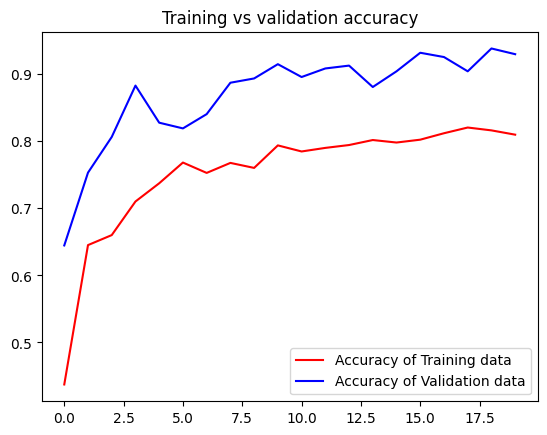

<Figure size 640x480 with 0 Axes>

In [138]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

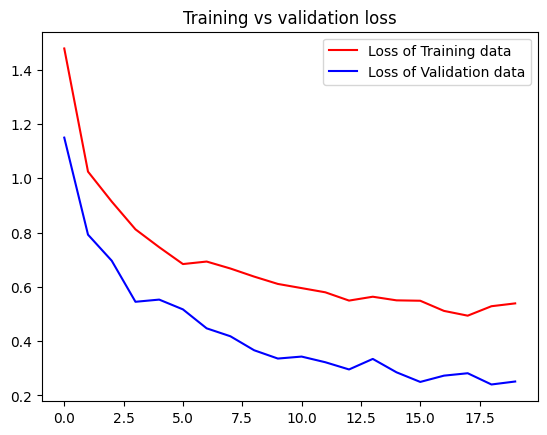

<Figure size 640x480 with 0 Axes>

In [139]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

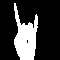

In [140]:
load_img("/content/drive/MyDrive/Colab Notebooks/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

In [142]:
image=load_img("/content/drive/MyDrive/Colab Notebooks/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [146]:
# This is the input data
data = [[4.9425038e-03, 1.1042603e-04, 6.9518052e-03, 2.3800093e-03, 1.3897400e-03, 9.8422551e-01]]

# This is the number of clusters
num_clusters = 5

# Create a dictionary to store cluster assignments
cluster_assignments = {}

# Print the keys in the cluster_assignments dictionary
print(cluster_assignments.keys())

dict_keys([])


In [147]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)
    PRED+=[value2]

(627, 60, 60, 3)
20/20 [==============================] - 8s 426ms/step
(627, 6)


In [148]:
ANS=tlabels0

In [149]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.89792663476874


**Model Save And Load**

In [150]:
model.save('handgest.hdf5')
model2 = keras.models.load_model('handgest.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [151]:
prediction3=model2.predict(test)

PRED3=[]
for item in prediction3:
    value3=np.argmax(item)
    PRED3+=[value3]

20/20 [==============================] - 14s 472ms/step


In [152]:
accuracy3=accuracy_score(ANS,PRED3)
print(accuracy3)

0.89792663476874
